# Recreate the Tesla Cybertruck with Matplotlib

In this challenge, you will recreate the new [Tesla Cybertruck][0] unveiled last week using matplotlib.

![](../images/tesla.png)

[0]: https://www.tesla.com/cybertruck

### Challenge

Use matplotlib to recreate the image directly above.

### Extra Challenge

Add animation so that it drives off the screen.

## Solution

Before going into detail, let's jump to the results. Here is the completed recreation of the Tesla Cybertruck that drives off the screen. 

<video controls src="../images/tesla_animate.mp4" />

### Tutorial

A tutorial will now follow that describes the recreation. It will discuss the following:


* Figure and Axes setup
* Adding shapes
* Color gradients
* Animation

Understanding these topics should give you enough to start animating your own figures in matplotlib.

### Figure and Axes setup

We first create a matplotlib Figure and Axes, remove the axis labels and tick marks, and set the x and y axis limits. The `fill_between` method is used to set two different background colors.

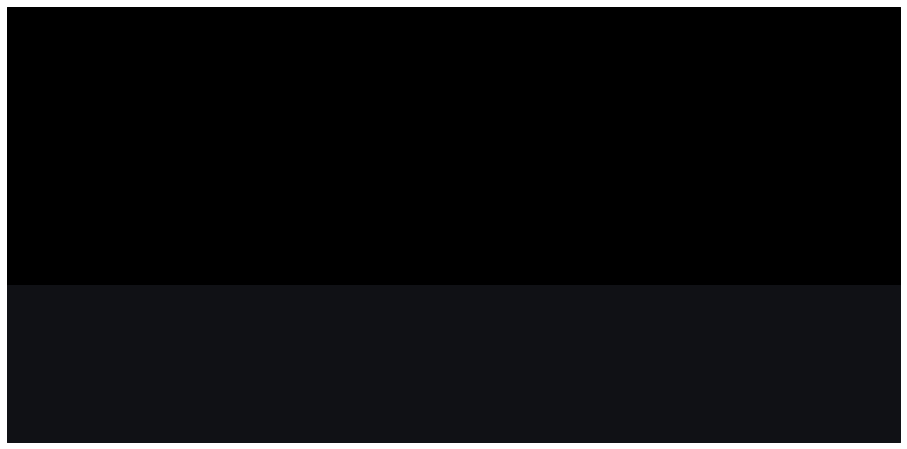

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 8))
ax.axis('off')
ax.set_ylim(0, 1)
ax.set_xlim(0, 2)
ax.fill_between(x=[0, 2], y1=.36, y2=1, color='black')
ax.fill_between(x=[0, 2], y1=0, y2=.36, color='#101115');

### Shapes in matplotlib

Most of the Cybertruck is composed of shapes (patches in matplotlib terminology) - circles, rectangles, and polygons. These shapes are available in the patches matplotlib module. After importing, we instantiate single instances of these patches and then call the `add_patch` method to add the patch to the Axes.

For the Cybertruck, I used three patches, `Polygon`, `Rectangle`, and `Circle`. They each have different parameters available in their constructor. I first constructed the body of the car as four polygons. Two other polygons were used for the rims. Each polygon is provided a list of x, y coordinates where the corners are located. Matplotlib connects all the points in order and fills it in with the provided color.

In [2]:
from matplotlib.patches import Polygon, Rectangle, Circle

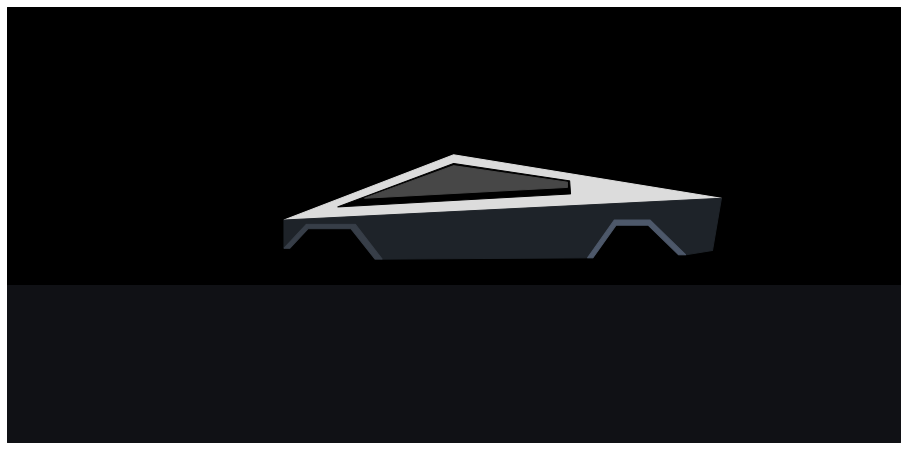

In [3]:
top = Polygon([[.62, .51], [1, .66], [1.6, .56]], color='#DCDCDC')
windows = Polygon([[.74, .54], [1, .64], [1.26, .6], [1.262, .57]], color='black')
windows_bottom = Polygon([[.8, .56], [1, .635], [1.255, .597], [1.255, .585]], color='#474747')
base = Polygon([[.62, .51], [.62, .445], [.67, .5], [.78, .5], [.84, .42], [1.3, .423],
               [1.36, .51], [1.44, .51], [1.52, .43], [1.58, .44], [1.6, .56]], color="#1E2329")
left_rim = Polygon([[.62, .445], [.67, .5], [.78, .5], [.84, .42], [.824, .42], [.77, .49],
                        [.674, .49], [.633, .445]], color='#373E48')
right_rim = Polygon([[1.3, .423], [1.36, .51], [1.44, .51], [1.52, .43], 
                         [1.504, .43], [1.436, .498], [1.364, .498], [1.312, .423]], color='#4D586A')

ax.add_patch(top)
ax.add_patch(windows)
ax.add_patch(windows_bottom)
ax.add_patch(base)
ax.add_patch(left_rim)
ax.add_patch(right_rim)
fig

#### Tires

I used three `Circle` patches for each of the tires. You must provide the center and radius.

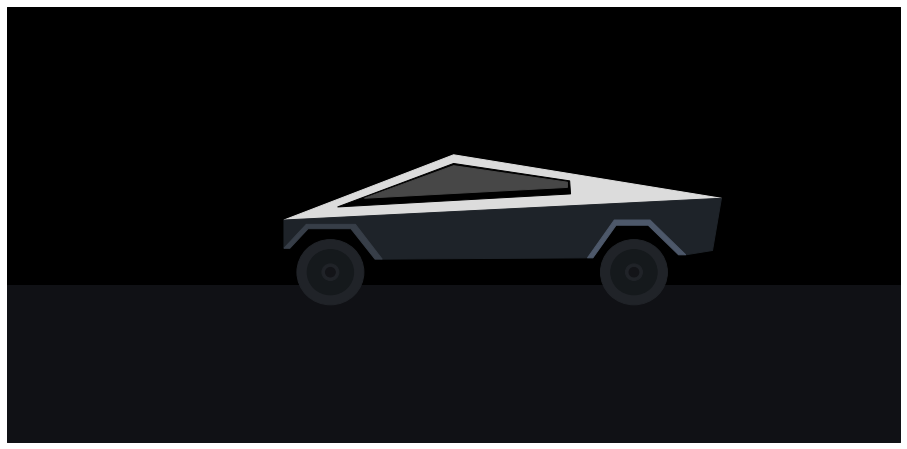

In [4]:
left_tire = Circle((.724, .39), radius=.075, color="#202328")
right_tire = Circle((1.404, .39), radius=.075, color="#202328")
left_inner_tire = Circle((.724, .39), radius=.052, color="#15191C")
right_inner_tire = Circle((1.404, .39), radius=.052, color="#15191C")
left_spoke = Circle((.724, .39), radius=.019, color="#202328")
right_spoke = Circle((1.404, .39), radius=.019, color="#202328")
left_inner_spoke = Circle((.724, .39), radius=.011, color="#131418")
right_inner_spoke = Circle((1.404, .39), radius=.011, color="#131418")

ax.add_patch(left_tire)
ax.add_patch(right_tire)
ax.add_patch(left_inner_tire)
ax.add_patch(right_inner_tire)
ax.add_patch(left_spoke)
ax.add_patch(right_spoke)
ax.add_patch(left_inner_spoke)
ax.add_patch(right_inner_spoke)
fig

#### Axels

I used the `Rectangle` patch to represent the two 'axels' (this isn't the correct term, but you'll see what I mean) going through the tires. You must provide a coordinate for the lower left corner and a width and a height. You can also provide it an angle (in degrees) to further control its position. Notice that they are currently displayed over the inner tire circle. This will get fixed when we combine all the patches together.

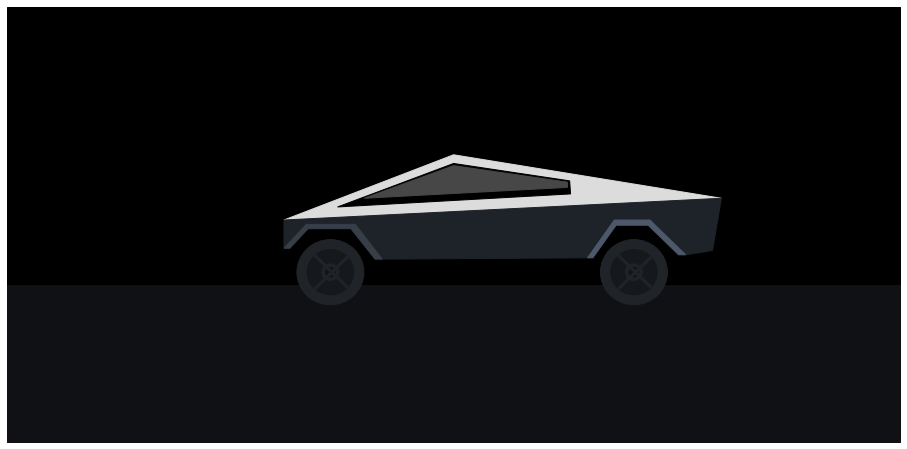

In [5]:
left_left_axel = Rectangle((.687, .427), width=.104, height=.005, angle=315, color='#202328')
left_right_axel = Rectangle((.761, .427), width=.104, height=.005, angle=225, color='#202328')
right_left_axel = Rectangle((1.367, .427), width=.104, height=.005, angle=315, color='#202328')
right_right_axel = Rectangle((1.441, .427), width=.104, height=.005, angle=225, color='#202328')
    
ax.add_patch(left_left_axel)
ax.add_patch(left_right_axel)
ax.add_patch(right_left_axel)
ax.add_patch(right_right_axel)
fig

#### Other details

The front bumper, head light, tail light, door and window lines are added below. I used regular matplotlib lines for some of these. Those lines are not patches and get added to the Axes without any other additional method.

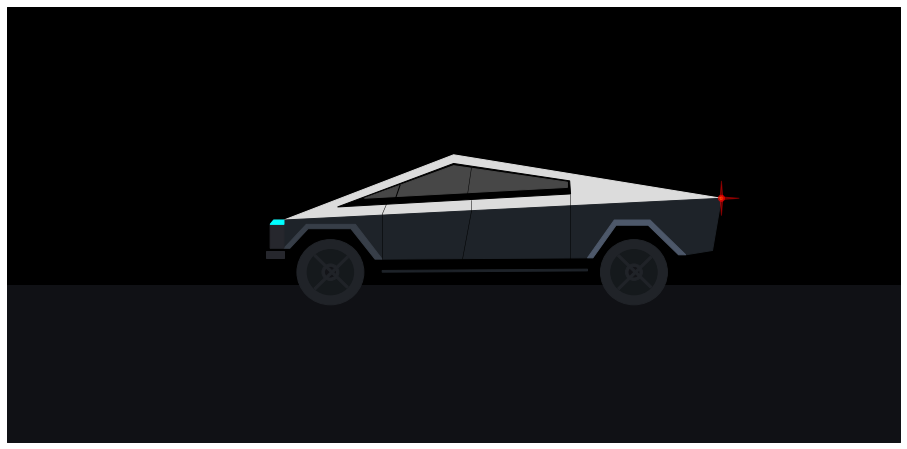

In [6]:
# other details
front = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .445], [.62, .445]], color='#26272d')
front_bottom = Polygon([[.62, .438], [.58, .438], [.58, .423], [.62, .423]], color='#26272d')
head_light = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .5], [.62, .5]], color='aqua')
step = Polygon([[.84, .39], [.84, .394], [1.3, .397], [1.3, .393]], color='#1E2329')

# doors
ax.plot([.84, .84], [.42, .523], color='black', lw=.5)
ax.plot([1.02, 1.04], [.42, .53], color='black', lw=.5)
ax.plot([1.26, 1.26], [.42, .54], color='black', lw=.5)

ax.plot([.84, .85], [.523, .547], color='black', lw=.5)
ax.plot([1.04, 1.04], [.53, .557], color='black', lw=.5)
ax.plot([1.26, 1.26], [.54, .57], color='black', lw=.5)

# window lines
ax.plot([.87, .88], [.56, .59], color='black', lw=1)
ax.plot([1.03, 1.04], [.56, .63], color='black', lw=.5)

# tail light
tail_light = Circle((1.6, .56), radius=.007, color='red', alpha=.6)
tail_light_center = Circle((1.6, .56), radius=.003, color='yellow', alpha=.6)
tail_light_up = Polygon([[1.597, .56], [1.6, .6], [1.603, .56]], color='red', alpha=.4)
tail_light_right = Polygon([[1.6, .563], [1.64, .56], [1.6, .557]], color='red', alpha=.4)
tail_light_down = Polygon([[1.597, .56], [1.6, .52], [1.603, .56]], color='red', alpha=.4)

ax.add_patch(front)
ax.add_patch(front_bottom)
ax.add_patch(head_light)
ax.add_patch(step)
ax.add_patch(tail_light)
ax.add_patch(tail_light_center)
ax.add_patch(tail_light_up)
ax.add_patch(tail_light_right)
ax.add_patch(tail_light_down)
fig

#### Color gradients for the head light beam

The head light beam has a distinct color gradient that dissapates into the night sky. This is a challenging to do. I found an [excellent answer on Stack Overflow from user Joe Kington][0] on how to do this. We begin, by using the `imshow` function which creates images from 3-dimensional arrays. We create a 100 x 100 x 4 array that represents 100 x 100 points of RGBA (red, geren, blue, alpha) values. Every point has the same red, green, and blue values of (0, 1, 1) which represents the color alpha, but has an alpha value that ranges from 0 to 1. The further from the head light, the smaller the alpha. The alpha represents opacity. This slowly decreases the opacity until it reaches 0. The `extent` parameter controls the rectangular region (xmin, xmax, ymin, ymax) where the image will be shown.

[0]: https://stackoverflow.com/questions/29321835/is-it-possible-to-get-color-gradients-under-curve-in-matplotlib

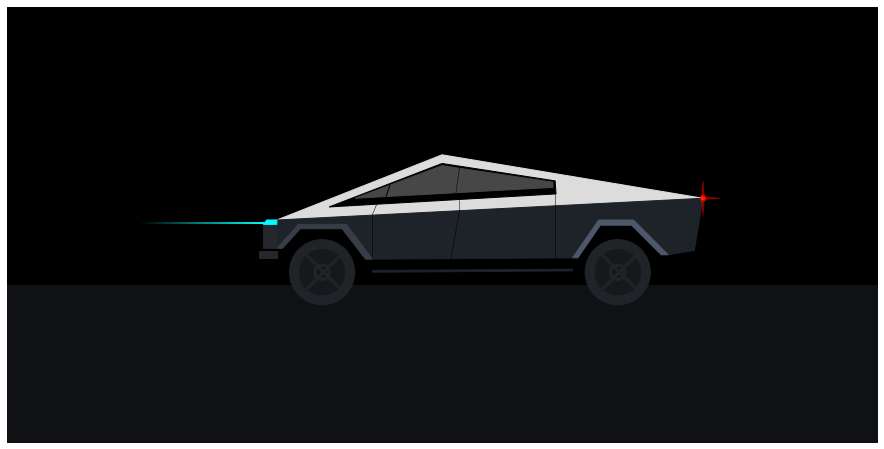

In [7]:
import matplotlib.colors as mcolors
z = np.empty((100, 100, 4), dtype=float)
rgb = mcolors.colorConverter.to_rgb('aqua')
z[:, :, :3] = rgb
alphas = np.linspace(0, 1, 100)[:, None]
alphas = np.tile(alphas, 100).T
z[:, :, -1] = alphas

im = ax.imshow(z, extent=[.3, .589, .501, .505], zorder=1)
fig

#### Proportional alphas

Below, two more aqua images are added. The alpha values are directly proportional to the distance from the center of the rectangular region defined by `extent`. They eventually decrease to 0.

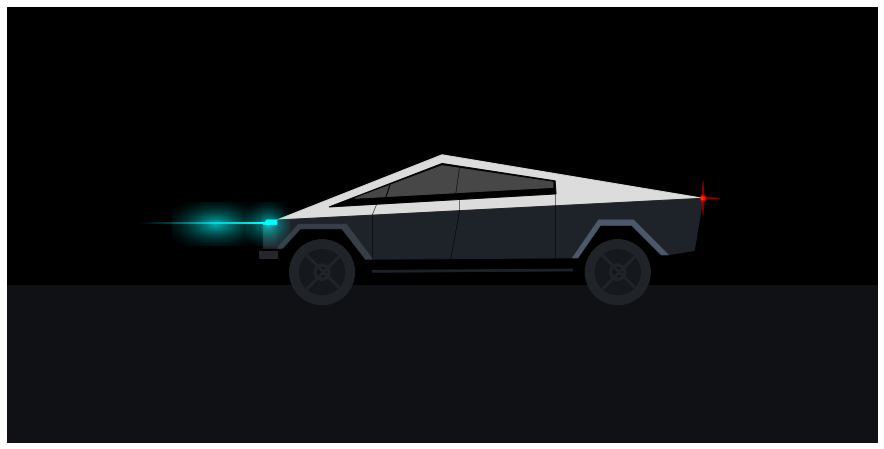

In [8]:
# beam clouds
x = np.arange(100)
y = (50 - x) ** 2
z2 = np.empty((100, 100, 4), dtype=float)
rgb = mcolors.colorConverter.to_rgb('aqua')
z2[:,:,:3] = rgb
z2[:, :, -1] = 1 - np.sqrt(y.reshape(1, -1) + y.reshape(-1, 1)) / 71
z2[:, :, -1] **= 2
z2[:, :, -1] *= .7

im2 = ax.imshow(z2, extent=[.55, .65, .45, .55], zorder=1)
im3 = ax.imshow(z2, extent=[.38, .58, .45, .55], zorder=1)
fig

#### Gradients in patches

Color gradients within patches is a bit more work. You'll need to first create an image like we did above. Construct the patch setting the color to 'none' and add the patch as normal. Finally, call the `set_clip_path` method of the image passing it the patch.

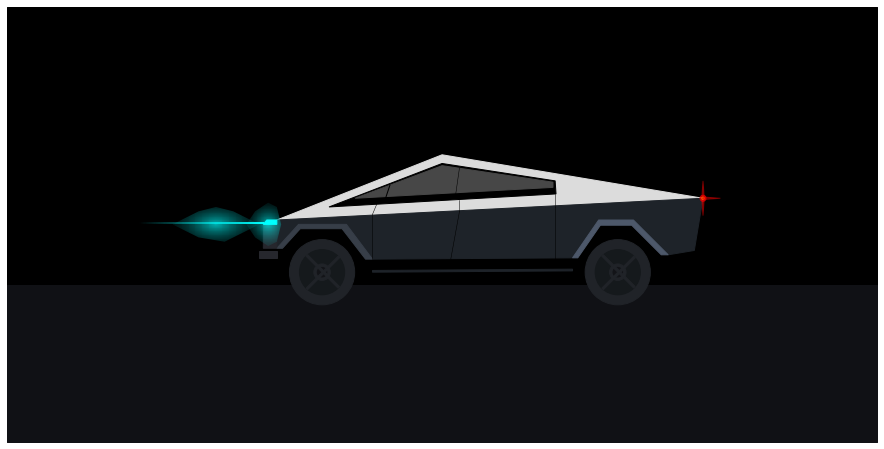

In [9]:
beam_cloud_1 = Polygon([[.6, .45], [.57, .47], [.55, .5], [.57, .53], [.6, .55], 
                            [.62, .54], [.625, .52], [.63, .5], [.625, .48], [.62, .46] ], color='none')
    
beam_cloud_2 = Polygon([[.58, .5], [.52, .53], [.48, .54], [.44, .53], [.38, .5], 
                        [.44, .47], [.5, .46], [.52, .47]], color='none')

ax.add_patch(beam_cloud_1)
im2.set_clip_path(beam_cloud_1)

ax.add_patch(beam_cloud_2)
im3.set_clip_path(beam_cloud_2)
fig

### Creating a Function to Draw the Car

All of our work from above can be placed in a function that draws the car. This will be used when initializing our animation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle, Circle
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation

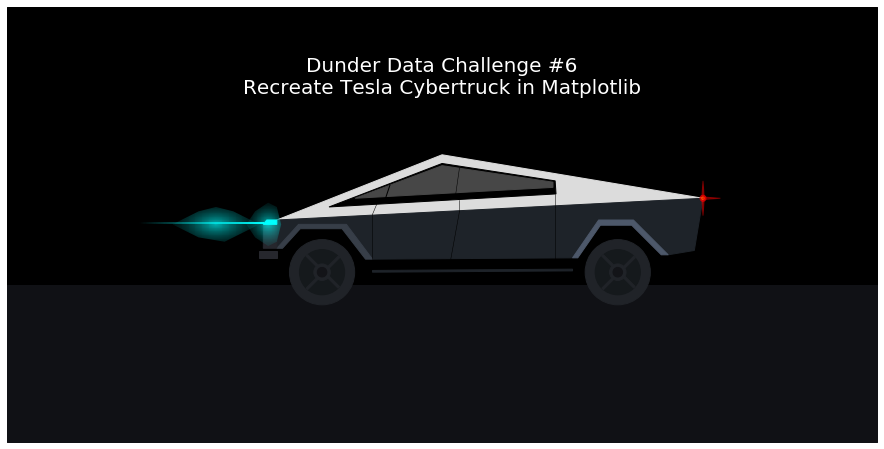

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(16, 8))

def draw_car():
    fig.clear()
    ax = fig.add_subplot()
    ax.axis('off')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 2)
    ax.fill_between(x=[0, 2], y1=.36, y2=1, color='black')
    ax.fill_between(x=[0, 2], y1=0, y2=.36, color='#101115')
    ax.text(1, .8, 'Dunder Data Challenge #6\nRecreate Tesla Cybertruck in Matplotlib', 
            color='white', fontsize=20, ha='center')
    
    top = Polygon([[.62, .51], [1, .66], [1.6, .56]], color='#DCDCDC')
    windows = Polygon([[.74, .54], [1, .64], [1.26, .6], [1.262, .57]], color='black')
    windows_bottom = Polygon([[.8, .56], [1, .635], [1.255, .597], [1.255, .585]], color='#474747')
    base = Polygon([[.62, .51], [.62, .445], [.67, .5], [.78, .5], [.84, .42], [1.3, .423],
                   [1.36, .51], [1.44, .51], [1.52, .43], [1.58, .44], [1.6, .56]], color="#1E2329")
    left_rim = Polygon([[.62, .445], [.67, .5], [.78, .5], [.84, .42], [.824, .42], [.77, .49],
                        [.674, .49], [.633, .445]], color='#373E48')
    right_rim = Polygon([[1.3, .423], [1.36, .51], [1.44, .51], [1.52, .43], 
                         [1.504, .43], [1.436, .498], [1.364, .498], [1.312, .423]], color='#4D586A')
    
    left_tire = Circle((.724, .39), radius=.075, color="#202328")
    right_tire = Circle((1.404, .39), radius=.075, color="#202328")
    left_inner_tire = Circle((.724, .39), radius=.052, color="#15191C")
    right_inner_tire = Circle((1.404, .39), radius=.052, color="#15191C")
    left_spoke = Circle((.724, .39), radius=.019, color="#202328")
    right_spoke = Circle((1.404, .39), radius=.019, color="#202328")
    left_inner_spoke = Circle((.724, .39), radius=.011, color="#131418")
    right_inner_spoke = Circle((1.404, .39), radius=.011, color="#131418")

    left_left_axel = Rectangle((.687, .427), width=.104, height=.005, angle=315, color='#202328')
    left_right_axel = Rectangle((.761, .427), width=.104, height=.005, angle=225, color='#202328')
    right_left_axel = Rectangle((1.367, .427), width=.104, height=.005, angle=315, color='#202328')
    right_right_axel = Rectangle((1.441, .427), width=.104, height=.005, angle=225, color='#202328')
    
    front = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .445], [.62, .445]], color='#26272d')
    front_bottom = Polygon([[.62, .438], [.58, .438], [.58, .423], [.62, .423]], color='#26272d')
    head_light = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .5], [.62, .5]], color='aqua')
    
    step = Polygon([[.84, .39], [.84, .394], [1.3, .397], [1.3, .393]], color='#1E2329')
    
    # doors
    ax.plot([.84, .84], [.42, .523], color='black', lw=.5)
    ax.plot([1.02, 1.04], [.42, .53], color='black', lw=.5)
    ax.plot([1.26, 1.26], [.42, .54], color='black', lw=.5)
    
    ax.plot([.84, .85], [.523, .547], color='black', lw=.5)
    ax.plot([1.04, 1.04], [.53, .557], color='black', lw=.5)
    ax.plot([1.26, 1.26], [.54, .57], color='black', lw=.5)
    
    # window lines
    ax.plot([.87, .88], [.56, .59], color='black', lw=1)
    ax.plot([1.03, 1.04], [.56, .63], color='black', lw=.5)
    
    # tail light
    tail_light = Circle((1.6, .56), radius=.007, color='red', alpha=.6)
    tail_light_center = Circle((1.6, .56), radius=.003, color='yellow', alpha=.6)
    tail_light_up = Polygon([[1.597, .56], [1.6, .6], [1.603, .56]], color='red', alpha=.4)
    tail_light_right = Polygon([[1.6, .563], [1.64, .56], [1.6, .557]], color='red', alpha=.4)
    tail_light_down = Polygon([[1.597, .56], [1.6, .52], [1.603, .56]], color='red', alpha=.4)
    
    ax.add_patch(top)
    ax.add_patch(windows)
    ax.add_patch(windows_bottom)
    ax.add_patch(base)
    ax.add_patch(left_rim)
    ax.add_patch(right_rim)
    ax.add_patch(left_tire)
    ax.add_patch(right_tire)
    ax.add_patch(left_inner_tire)
    ax.add_patch(right_inner_tire)
    ax.add_patch(left_left_axel)
    ax.add_patch(left_right_axel)
    ax.add_patch(right_left_axel)
    ax.add_patch(right_right_axel)
    ax.add_patch(left_spoke)
    ax.add_patch(right_spoke)
    ax.add_patch(left_inner_spoke)
    ax.add_patch(right_inner_spoke)
    ax.add_patch(front)
    ax.add_patch(front_bottom)
    ax.add_patch(head_light)
    ax.add_patch(step)
    ax.add_patch(tail_light)
    ax.add_patch(tail_light_center)
    ax.add_patch(tail_light_up)
    ax.add_patch(tail_light_right)
    ax.add_patch(tail_light_down)
    
    # head light
    z = np.empty((100, 100, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb('aqua')
    z[:, :, :3] = rgb
    alphas = np.linspace(0, 1, 100)[:, None]
    alphas = np.tile(alphas, 100).T
    z[:, :, -1] = alphas
    
    # beam clouds
    x = np.arange(100)
    y = (50 - x) ** 2
    z2 = np.empty((100, 100, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb('aqua')
    z2[:,:,:3] = rgb
    z2[:, :, -1] = 1 - np.sqrt(y.reshape(1, -1) + y.reshape(-1, 1)) / 71
    z2[:, :, -1] **= 2
    z2[:, :, -1] *= .7
    
    im = ax.imshow(z, extent=[.3, .589, .501, .505], zorder=1)
    im2 = ax.imshow(z2, extent=[.55, .65, .45, .55], zorder=1)
    im3 = ax.imshow(z2, extent=[.38, .58, .45, .55], zorder=1)
    
    # clip beam clouds
    beam_cloud_1 = Polygon([[.6, .45], [.57, .47], [.55, .5], [.57, .53], [.6, .55], 
                            [.62, .54], [.625, .52], [.63, .5], [.625, .48], [.62, .46] ], color='none')
    
    beam_cloud_2 = Polygon([[.58, .5], [.52, .53], [.48, .54], [.44, .53], [.38, .5], 
                            [.44, .47], [.5, .46], [.52, .47]], color='none')
    
    ax.add_patch(beam_cloud_1)
    im2.set_clip_path(beam_cloud_1)
    
    ax.add_patch(beam_cloud_2)
    im3.set_clip_path(beam_cloud_2)
    
draw_car()

## Animation

Animation in matplotlib is fairly straightforward. You must create a function that updates the position of the objects in your figure for every frame. This function is called repeatedly for each frame that you create.

In the update function below, we loop through each patch, line and image in our Axes and reduce the x-value of each plotted object by .015. This has the effect of moving the truck to the left. The trickiest part was changing the x and y values for the rectangular tire 'axels'. Some basic trigonemtry helps calculate this.

Finally, the `FuncAnimation` class from the animation module is used to construct the animation. We provide it our update function and a function to call once to initialize the figure along with the number of frames and any extra arguments used during update.

In [12]:
def update(frame_number, x_delta, radius, angle):
    if frame_number == 0:
        return
    ax = fig.axes[0]
    for patch in ax.patches:
        if isinstance(patch, Polygon):
            arr = patch.get_xy()
            arr[:, 0] -= x_delta
        elif isinstance(patch, Circle):
            x, y = patch.get_center()
            patch.set_center((x - x_delta, y))
        elif isinstance(patch, Rectangle):
            xd_old = -np.cos(np.pi * patch.angle / 180) * radius
            yd_old = -np.sin(np.pi * patch.angle / 180) * radius
            patch.angle += angle
            xd = -np.cos(np.pi * patch.angle / 180) * radius
            yd = -np.sin(np.pi * patch.angle / 180) * radius
            x = patch.get_x()
            y = patch.get_y()
            x_new = x - x_delta + xd - xd_old
            y_new = y + yd - yd_old
            patch.set_x(x_new)
            patch.set_y(y_new)
        
    for line in ax.lines:
        xdata = line.get_xdata()
        line.set_xdata(xdata - x_delta)
        
    for image in ax.images:
        extent = image.get_extent()
        extent[0] -= x_delta
        extent[1] -= x_delta
        
animation = FuncAnimation(fig, update, init_func=draw_car, frames=110, 
                          repeat=False, fargs=(.015, .052, 4))

### Save animation

Finally, we can save the animation as an mp4 file (assuming you have ffmpeg). The html video tag is used in the markdown to display the animation.

In [13]:
animation.save('../images/tesla_animate.mp4', fps=30, bitrate=3000)

<video controls src="../images/tesla_animate.mp4" />